# Import the important library and exploring the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression  #logistic regresstion model
from sklearn import svm
from sklearn.svm import SVC                    # Support Vector machine mpodel
from sklearn.neighbors import KNeighborsClassifier  #KNN model
from sklearn.naive_bayes import GaussianNB #Nieve Bays model
from sklearn.tree import DecisionTreeClassifier #Decision Tree model
from sklearn.ensemble import RandomForestClassifier #Random Forest model
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

In [2]:
#importing the dataset
df=pd.read_csv("processed.cleveland.data")

In [3]:
#checking the head of the data
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      302 non-null    float64
 1   sex      302 non-null    float64
 2   cp       302 non-null    float64
 3   restbp   302 non-null    float64
 4   chol     302 non-null    float64
 5   fbs      302 non-null    float64
 6   restecg  302 non-null    float64
 7   thalach  302 non-null    float64
 8   exang    302 non-null    float64
 9   oldpeak  302 non-null    float64
 10  slope    302 non-null    float64
 11  ca       302 non-null    object 
 12  thal     302 non-null    object 
 13  hd       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


# Identifying Missing Data and dealing with them.

In [6]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [8]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [9]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
len(df)

302

In [11]:
no_miss=df.loc[(df['ca']!='?')&(df['thal']!='?')]

In [12]:
len(no_miss)

296

In [17]:
no_miss.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# Creating visual methods to analyze the data.

In [13]:
#check the correlation of the data
no_miss.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
age,1.000000,-0.094802,0.118743,0.288805,0.203846,0.125821,0.147193,-0.395204,0.098919,0.194405,0.153807,0.225141
sex,-0.094802,1.000000,0.014272,-0.068212,-0.197629,0.033539,0.031618,-0.060586,0.145444,0.104357,0.028328,0.229002
cp,0.118743,0.014272,1.000000,-0.031599,0.070606,-0.040004,0.072291,-0.342089,0.375759,0.213564,0.171151,0.402260
restbp,0.288805,-0.068212,-0.031599,1.000000,0.132380,0.176636,0.147075,-0.049199,0.068578,0.189078,0.116556,0.161882
chol,0.203846,-0.197629,0.070606,0.132380,1.000000,0.015132,0.166298,-0.000058,0.058744,0.039676,-0.007164,0.065805
fbs,0.125821,0.033539,-0.040004,0.176636,0.015132,1.000000,0.061255,-0.008067,0.004878,-0.000472,0.029783,0.055959
restecg,0.147193,0.031618,0.072291,0.147075,0.166298,0.061255,1.000000,-0.072474,0.084466,0.110482,0.128753,0.187266
thalach,-0.395204,-0.060586,-0.342089,-0.049199,-0.000058,-0.008067,-0.072474,1.000000,-0.384642,-0.348376,-0.392858,-0.421013
exang,0.098919,0.145444,0.375759,0.068578,0.058744,0.004878,0.084466,-0.384642,1.000000,0.292629,0.258355,0.390516
oldpeak,0.194405,0.104357,0.213564,0.189078,0.039676,-0.000472,0.110482,-0.348376,0.292629,1.000000,0.576984,0.505713


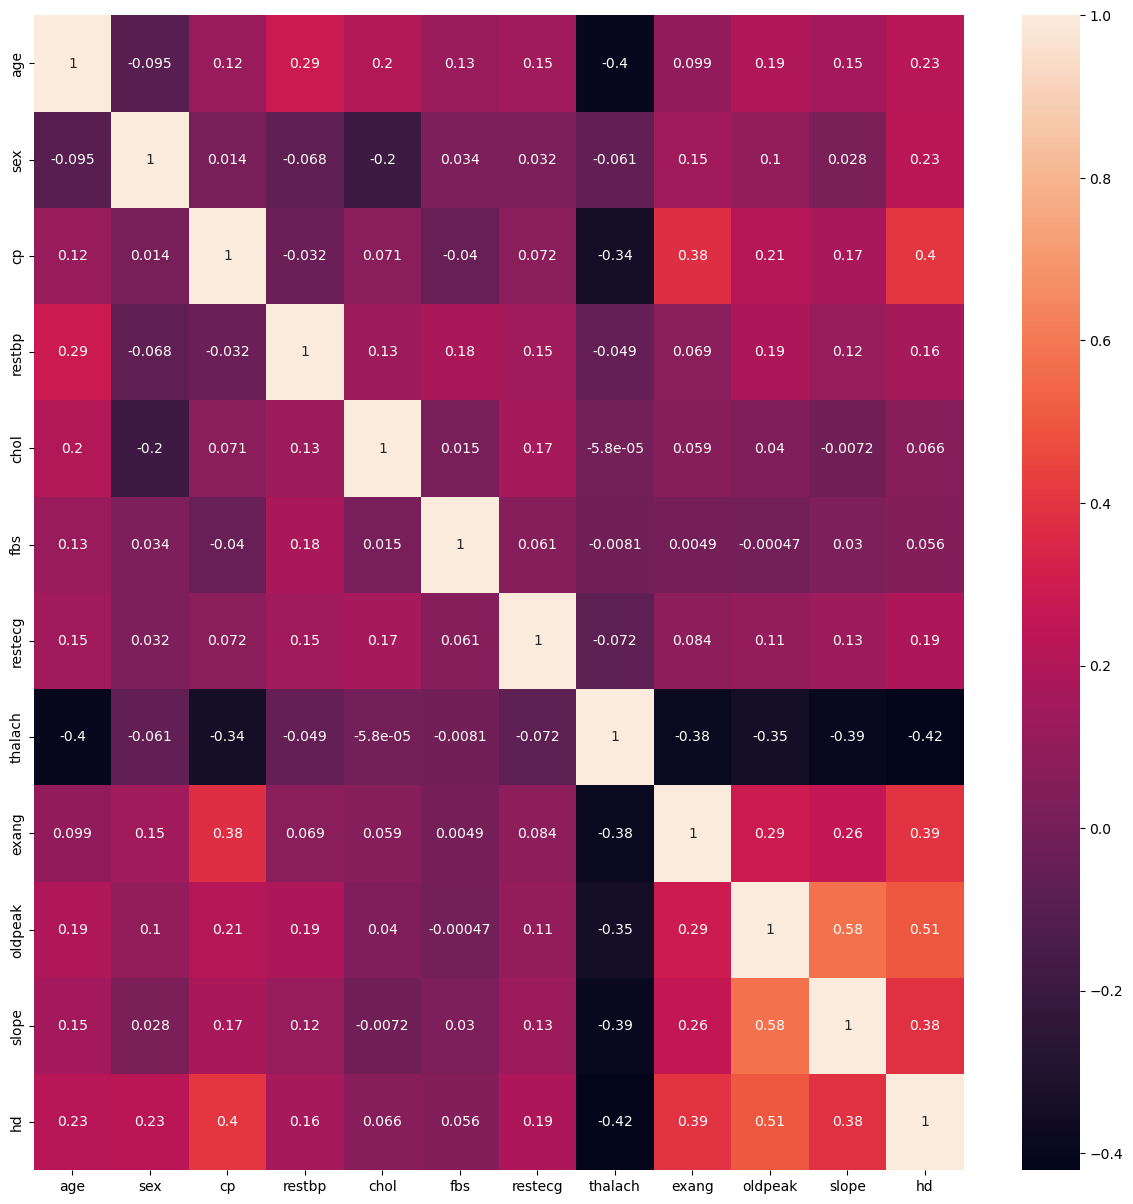

In [16]:
cor=no_miss.corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor,annot=True)
plt.show()

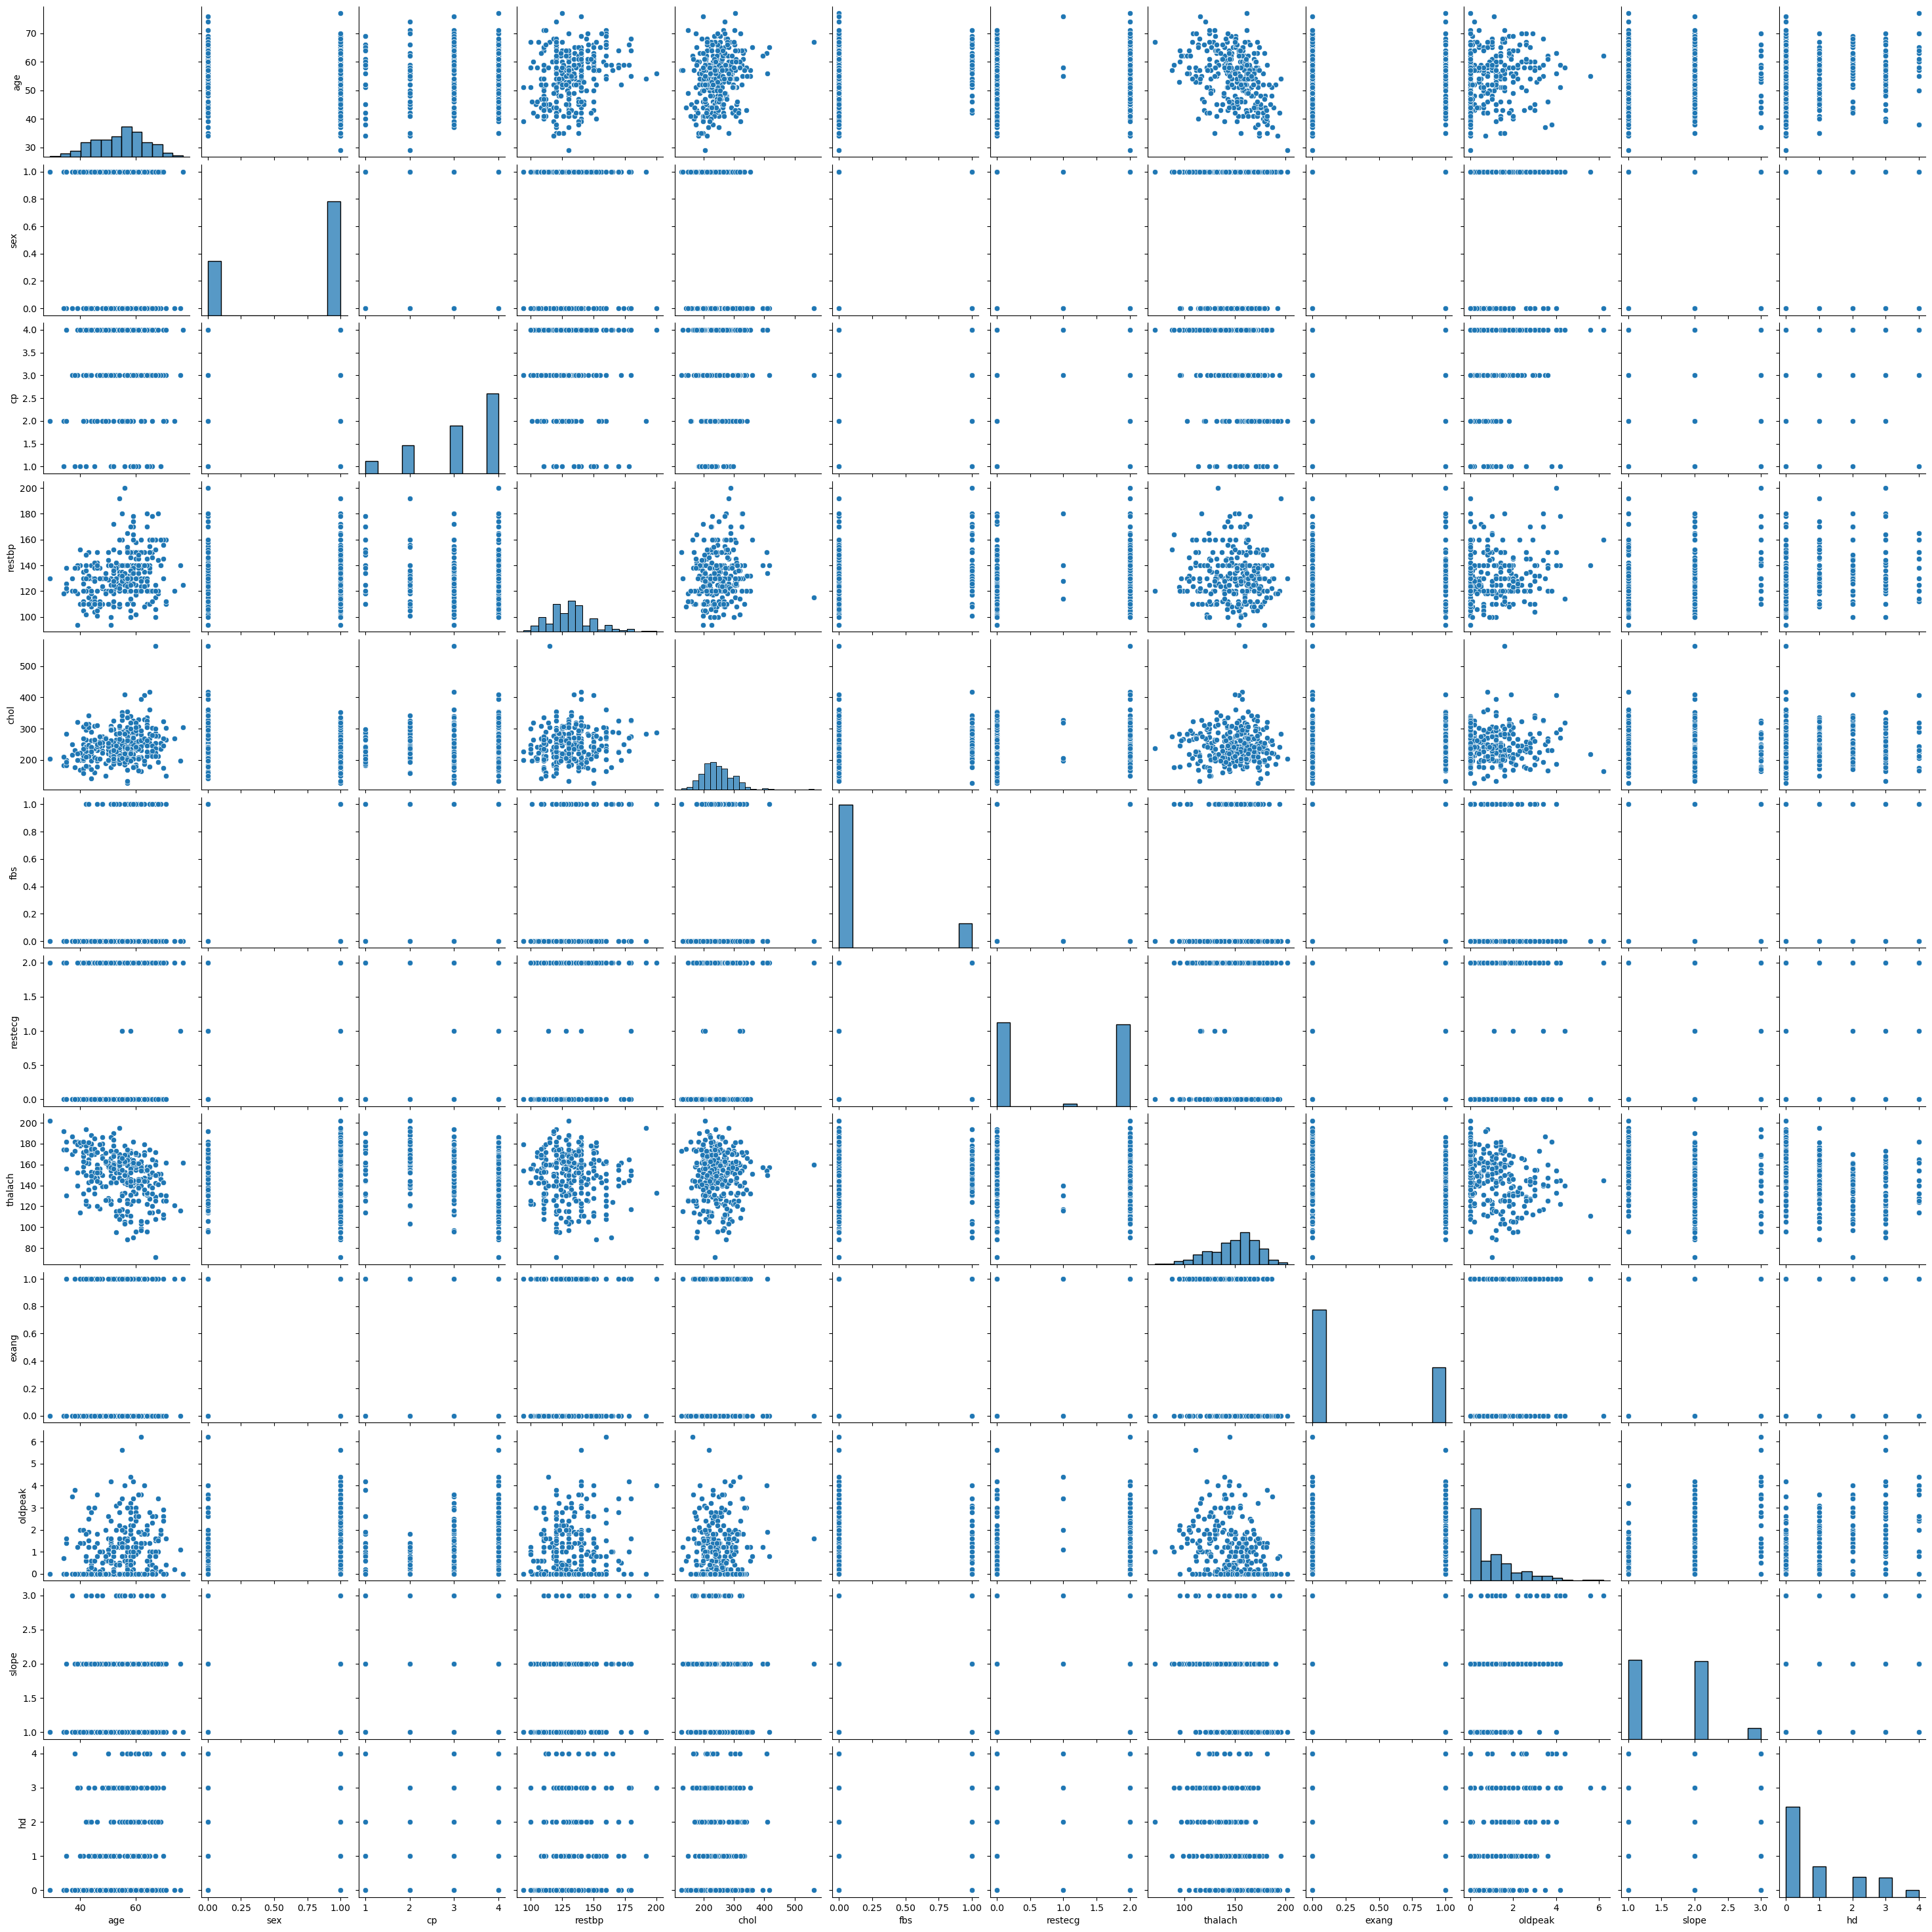

In [15]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'restbp'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'hd'}>]], dtype=object)

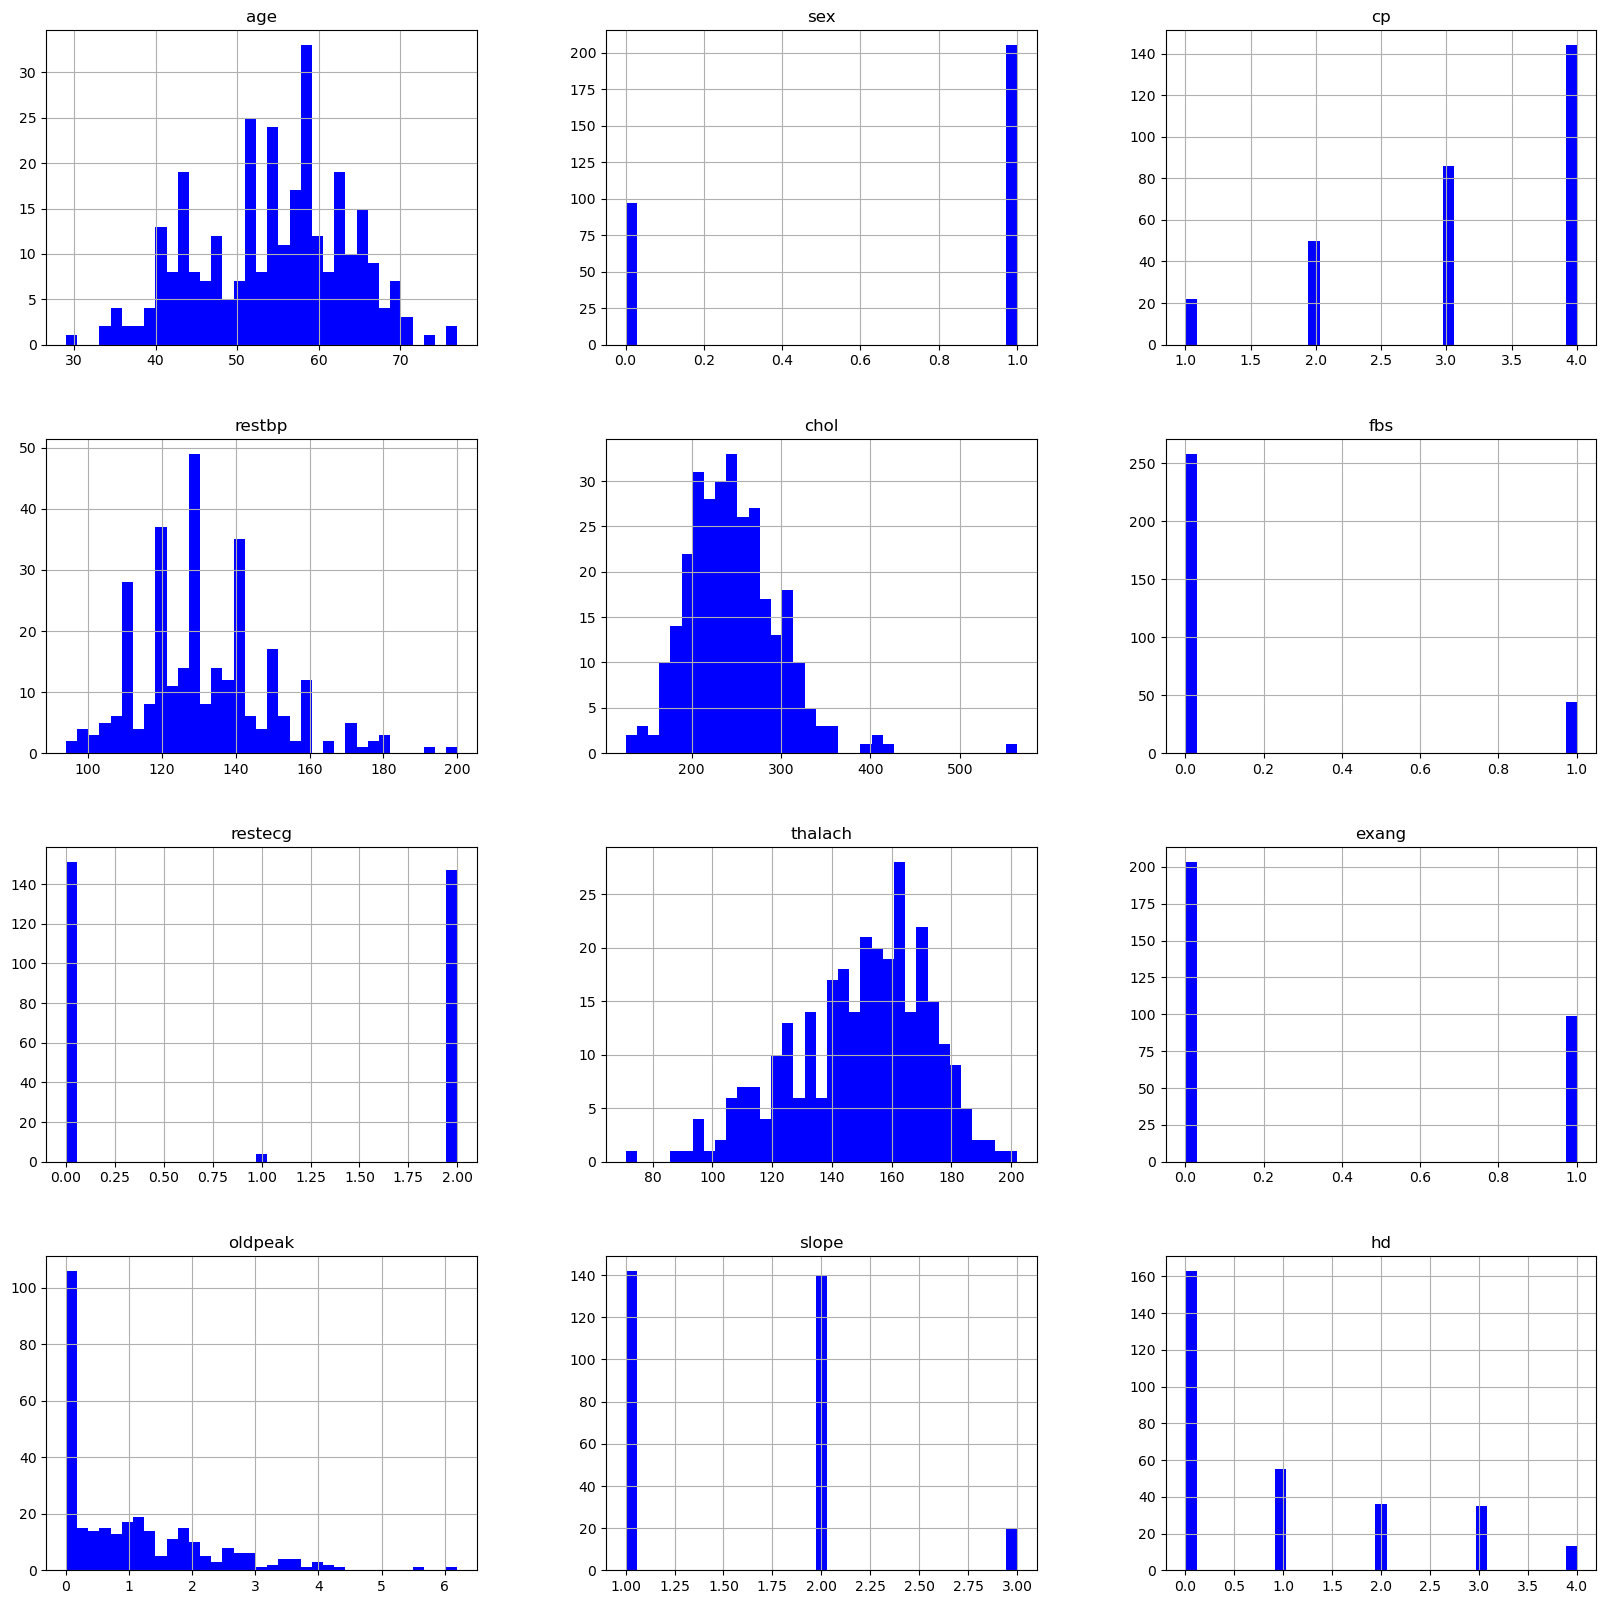

In [18]:
df.hist(bins=35,figsize=(20,20), color='b')

# Split the Data into Dependent and Independent Variables

In [19]:
x=no_miss.drop('hd',axis=1)
y=no_miss['hd']
x

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


# One-Hot Encoding

In [20]:
x_encoded=pd.get_dummies(x, columns=['cp','restecg','slope','thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [21]:
y1=y>0
y[y1]=1
y.unique()

C:\Users\alial\AppData\Local\Temp\ipykernel_14680\302423786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y1]=1
C:\Users\alial\anaconda3\lib\site-packages\pandas\core\series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


array([1, 0], dtype=int64)

# Centering and Scaling

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression model

In [33]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:

cm

array([[36,  7],
       [ 5, 26]], dtype=int64)

In [36]:
acc=accuracy_score(y_test, y_pred)
acc

0.8378378378378378

In [37]:
cr=classification_report(y_test, y_pred)

In [38]:
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.79      0.84      0.81        31

    accuracy                           0.84        74
   macro avg       0.83      0.84      0.83        74
weighted avg       0.84      0.84      0.84        74



C:\Users\alial\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


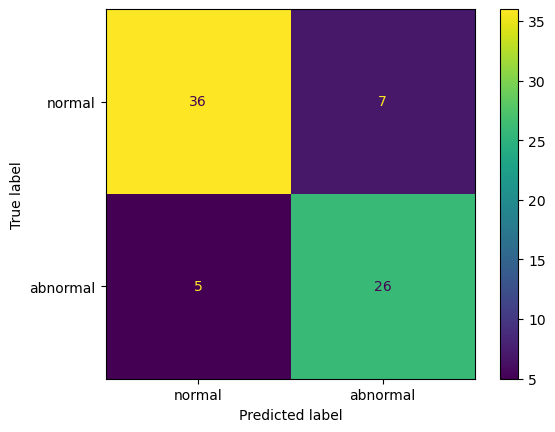

In [116]:
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(classifier,x_test,y_test,display_labels=['normal','abnormal'])

In [41]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of logistic model: ',acc *100,'%')

Accurcy of logistic model:  83.78378378378379 %


# Support vector machine classification model

In [42]:
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.svm import SVC # this will make a support vector machine for classificaiton

In [45]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.8558558558558559
poly
0.9234234234234234
rbf
0.9009009009009009
sigmoid
0.8243243243243243


In [83]:
param=[{'C':[0.01,0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001],'kernel':['poly']}]

gs=GridSearchCV(SVC(),param,cv=5,verbose=0)
gs.fit(x_train,y_train)
gs.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [112]:
clf=SVC(random_state=0,C=1,gamma=0.1,kernel='poly')
clf.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='poly', random_state=0)

In [113]:
x_test = x_test
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8918918918918919


In [114]:
# Predicting the Test set results
y_pred = clf.predict(x_test)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.85      0.90      0.88        31

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



C:\Users\alial\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


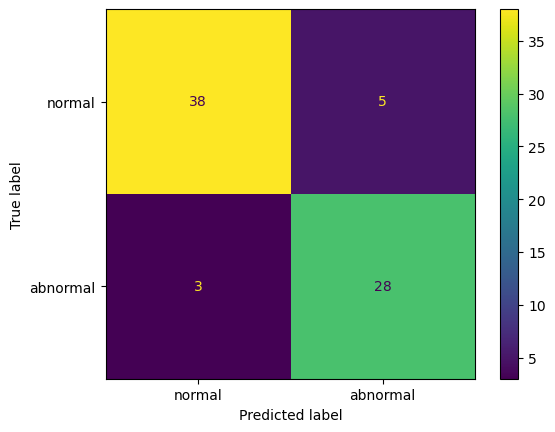

In [115]:
plot_confusion_matrix(clf,x_test,y_test,display_labels=['normal','abnormal'])

In [117]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Support vector machine classification model: ',acc *100,'%')

Accurcy of Support vector machine classification model:  89.1891891891892 %


# KNN model

In [118]:
KNN= KNeighborsClassifier(n_neighbors=17)
#Train the model using the train sets
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [119]:
y_pred= KNN.predict(x_test) 
print(accuracy_score(y_test,y_pred))

0.9054054054054054


C:\Users\alial\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\alial\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alial\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


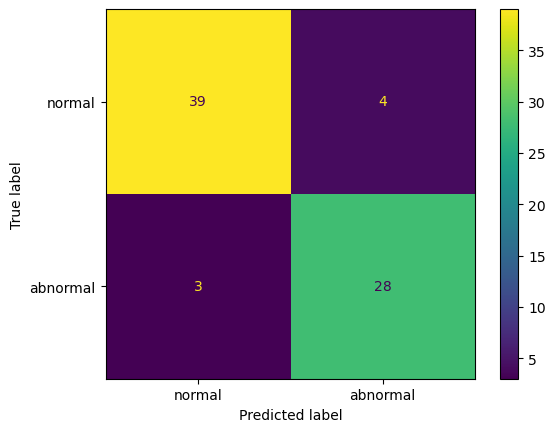

In [120]:
plot_confusion_matrix(KNN,x_test,y_test,display_labels=['normal','abnormal'])

In [121]:
# Predicting the Test set results
y_pred = KNN.predict(x_test)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.88      0.90      0.89        31

    accuracy                           0.91        74
   macro avg       0.90      0.91      0.90        74
weighted avg       0.91      0.91      0.91        74



C:\Users\alial\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [122]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of KNN model: ',acc *100,'%')

Accurcy of KNN model:  90.54054054054053 %


# Nieve Bayes Model

In [124]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [126]:
y_pred = classifier.predict(x_test)

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  5],
       [ 3, 28]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
acc=accuracy_score(y_test, y_pred)
acc

0.8918918918918919

In [129]:
cr=classification_report(y_test, y_pred)

In [131]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.85      0.90      0.88        31

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



C:\Users\alial\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


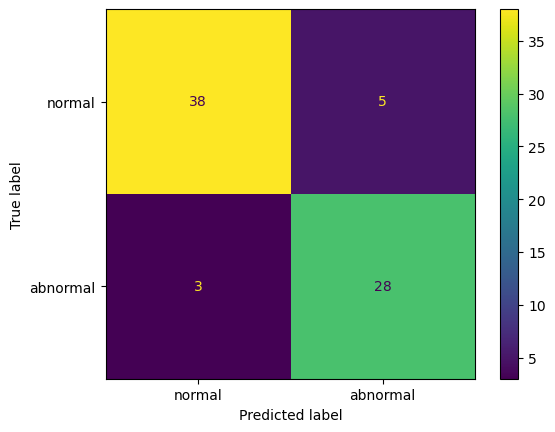

In [132]:
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(classifier,x_test,y_test,display_labels=['normal','abnormal'])

In [133]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Nieve Bayes model: ',acc *100,'%')

Accurcy of Nieve Bayes model:  89.1891891891892 %


# Decision Tree Model

In [135]:
param=[{'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20,50,100],
        'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}]

gs=GridSearchCV(DecisionTreeClassifier(),param,cv=5,verbose=0)
gs.fit(x_train,y_train)
gs.best_params_

C:\Users\alial\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alial\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alial\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\alial\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 6,
 'splitter': 'random'}

In [158]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='gini',splitter ='random',max_depth =3,max_leaf_nodes =6,random_state =0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, random_state=0,
                       splitter='random')

In [159]:
y_pred = classifier.predict(x_test)

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  8],
       [ 7, 24]], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
acc=accuracy_score(y_test, y_pred)
acc

0.7972972972972973

In [162]:
cr=classification_report(y_test, y_pred)

In [163]:
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        43
           1       0.75      0.77      0.76        31

    accuracy                           0.80        74
   macro avg       0.79      0.79      0.79        74
weighted avg       0.80      0.80      0.80        74



C:\Users\alial\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


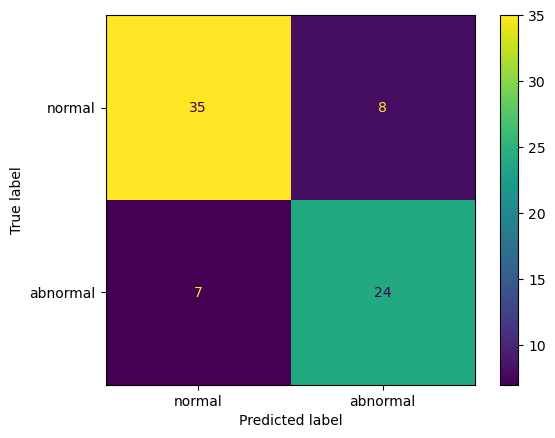

In [165]:
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(classifier,x_test,y_test,display_labels=['normal','abnormal'])

In [166]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Decision Tree model: ',acc *100,'%')

Accurcy of Decision Tree model:  79.72972972972973 %


# Random Forest Model

In [177]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [178]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[37,  6],
       [ 6, 25]], dtype=int64)

In [179]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
acc=accuracy_score(y_test, y_pred)
acc

0.8378378378378378

In [180]:
cr=classification_report(y_test, y_pred)

In [181]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.81      0.81      0.81        31

    accuracy                           0.84        74
   macro avg       0.83      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



C:\Users\alial\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


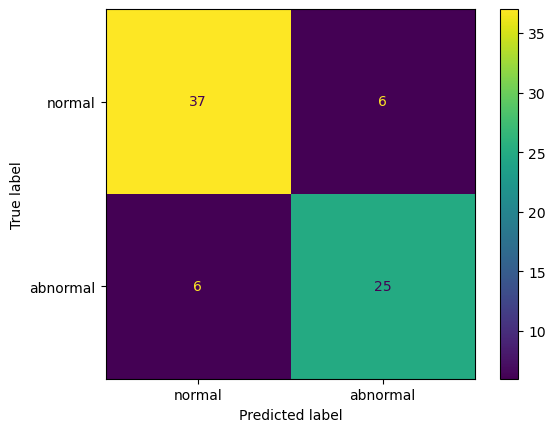

In [182]:
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(classifier,x_test,y_test,display_labels=['normal','abnormal'])

In [183]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Random Forest model: ',acc *100,'%')

Accurcy of Random Forest model:  83.78378378378379 %
